In [30]:
# ライブラリのインポート
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error # 回帰問題における性能評価に関する関数
from  sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix # 回帰問題における性能評価に関する関数

In [3]:
# ファイルのインポート
df_kick = pd.read_csv("./ks-projects-201801.csv")

In [7]:
# データ構成の把握
print(df_kick.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [9]:
#データの中身の参照
df_kick.head(n=5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [10]:
#データの平均等の把握
df_kick.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [35]:
#日数情報を追加する
df_kick["period"] = ((pd.to_datetime(df_kick["deadline"])) - (pd.to_datetime(df_kick["launched"])))
df_kick["period_days"] = df_kick["period"].map(lambda x: x.days)
display(df_kick.head())

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,success,period,period_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,False,58 days 11:47:32,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,False,59 days 19:16:03,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,False,44 days 23:39:10,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,False,29 days 20:35:49,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,False,55 days 15:24:57,55


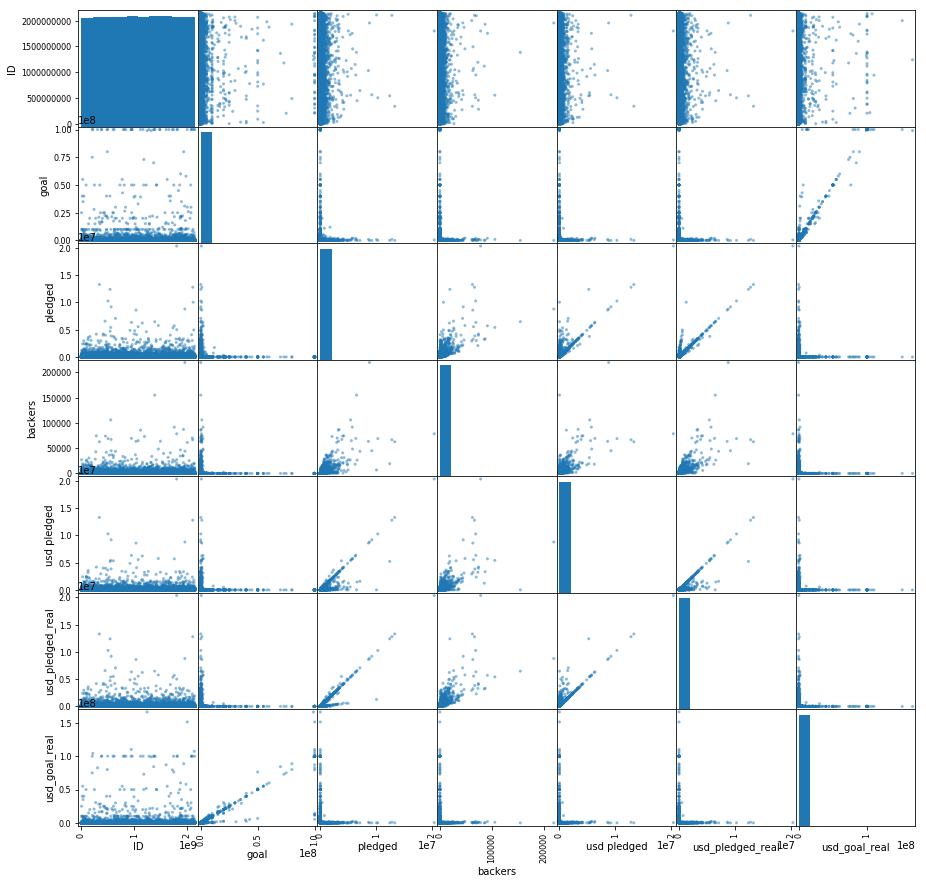

In [4]:
#散布図による確認
pd.plotting.scatter_matrix(df_kick, figsize=(15,15))
plt.show()

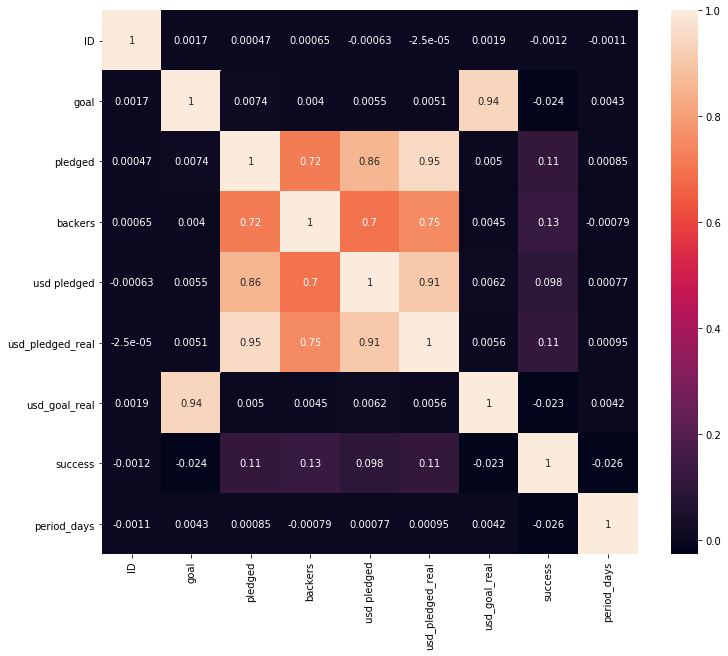

In [38]:
#ヒートマップでの把握
plt.figure(figsize=(12,10))
sns.heatmap(df_kick.corr(), annot=True)
plt.show()

In [36]:
#キーとなりそうな値を確認
display(df_kick.groupby("state").mean())
display(df_kick.groupby("category").mean())
display(df_kick.groupby("main_category").mean())
display(df_kick.groupby("currency").mean())
display(df_kick.groupby("country").mean())

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,success,period_days
state,,,,,,,,,
canceled,1.076086e+09,86193.059649,2645.752488,25.987390,1875.463782,2340.521661,75579.415376,False,37.269115
failed,1.074639e+09,67346.845539,1426.971450,16.422352,1133.741030,1320.603817,63174.742222,False,34.173352
live,1.084275e+09,76762.393355,9085.240497,68.099678,1254.124725,5869.166852,62535.280915,False,38.805288
successful,1.073727e+09,10162.960544,24099.779097,263.921362,17356.034449,22670.795231,9532.853357,True,31.156469
suspended,1.094302e+09,181370.796858,10816.813987,105.082340,7838.542478,9312.382952,175208.010265,False,43.476165
undefined,1.085224e+09,4405.393599,2279.674416,0.000000,NaN,2212.855236,4103.022038,False,31.877035


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,success,period_days
category,,,,,,,,,
3D Printing,1.075251e+09,47804.436310,71193.390117,232.472914,52103.444370,66323.861611,46619.814466,0.354319,32.754026
Academic,1.090998e+09,57203.094978,3841.758712,41.212882,1407.115666,2891.013886,54531.559913,0.205240,33.860262
Accessories,1.068838e+09,18969.507425,8062.904957,80.896051,4388.307372,6526.295185,14683.712872,0.339021,30.473302
Action,1.062188e+09,336436.035135,3694.626135,46.902703,2957.936216,3699.426324,317156.682865,0.144595,34.727027
Animals,1.141805e+09,11618.592157,2816.276745,42.149020,2345.198863,2994.210078,10586.491412,0.247059,30.258824
Animation,1.086438e+09,96265.994368,10300.824211,131.221173,8420.149736,9945.559303,91451.312739,0.268398,35.662338
Anthologies,1.067178e+09,11127.119898,11497.753852,227.507653,6805.039809,9851.566390,9359.719324,0.664541,31.205357
Apparel,1.077658e+09,37761.186157,6476.423665,51.331845,3474.465089,5463.306987,33368.742421,0.197321,31.968183
Apps,1.059581e+09,81346.703388,1856.951144,22.740741,1148.679794,1640.400125,70703.314258,0.059574,34.420331


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,success,period_days
main_category,,,,,,,,,
Art,1.077788e+09,40829.180144,3606.970044,42.205094,2534.057110,3220.986968,39198.575879,0.408837,32.136362
Comics,1.063611e+09,20243.646297,6899.311189,134.771236,5344.016859,6610.443828,19571.430669,0.539976,33.156946
Crafts,1.078527e+09,11592.285901,2016.153947,27.283687,1179.190619,1632.907282,10434.466228,0.240095,30.590078
Dance,1.075450e+09,10321.331290,3690.798684,42.801221,2962.990149,3452.946356,9588.328548,0.620488,32.102176
Design,1.078300e+09,46733.630260,27119.751279,241.299634,17033.026574,24417.034698,41871.388591,0.350848,33.982208
Fashion,1.069690e+09,24818.246005,6549.031814,61.447800,4279.731233,5712.450839,22412.409361,0.245135,31.856636
Film & Video,1.074967e+09,84334.009667,6362.733853,66.015208,5532.577810,6157.978427,82625.292254,0.371518,34.748762
Food,1.081894e+09,48693.745411,5340.163268,54.172466,4209.934253,5113.669716,49039.620804,0.247338,33.078449
Games,1.072129e+09,50711.298323,21865.173174,321.785615,16306.194882,21041.903140,44923.741408,0.355312,31.553689


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,success,period_days
currency,,,,,,,,,
AUD,1.071697e+09,7.144430e+04,7495.027277,80.857358,3955.286475,5902.166670,57353.168860,0.252956,32.542013
CAD,1.077457e+09,5.391303e+04,7602.504679,87.058080,4746.448935,6156.479931,43853.387176,0.276500,33.268547
CHF,1.050925e+09,2.605049e+05,16753.705143,87.450521,6344.158095,17013.244453,268848.329674,0.243490,56.410156
DKK,1.071658e+09,2.361709e+05,44681.533224,68.264836,4384.068428,6735.034145,35111.232046,0.320638,32.223206
EUR,1.072801e+09,6.659008e+04,7770.757490,83.708187,4600.078920,8699.151543,74891.452275,0.223039,33.947084
GBP,1.070063e+09,2.780493e+04,4750.083472,83.780236,5458.090623,6960.533247,42250.961734,0.353949,31.072337
HKD,1.069783e+09,1.859455e+05,126514.223948,136.820388,2914.223706,16228.940032,23865.608835,0.349515,33.404531
JPY,1.126430e+09,1.876522e+06,327079.400000,48.550000,792.095250,2897.210250,16596.918250,0.175000,30.650000
MXN,1.074426e+09,2.805255e+05,26591.472557,24.453196,161.457489,1387.002568,14869.932825,0.226027,35.955479


,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,success,period_days
country,,,,,,,,,
AT,1.096101e+09,3.982814e+04,14237.163250,109.278057,5423.952178,16190.600603,44652.387655,0.179229,34.075377
AU,1.072410e+09,7.238104e+04,7570.655780,82.002296,3955.286475,5962.128806,58108.238300,0.256410,32.536420
BE,1.085054e+09,3.344298e+04,6075.192820,54.298217,3703.173566,6777.240827,37322.199433,0.246353,34.092382
CA,1.077733e+09,5.459354e+04,7681.957883,88.273448,4746.448935,6220.748131,44408.442966,0.280157,33.258878
CH,1.048203e+09,2.628623e+05,16893.581537,88.254928,6344.158095,17155.217096,271281.726675,0.245729,56.583443
DE,1.075534e+09,6.833548e+04,8530.012513,98.333014,5303.889429,9536.387924,75208.408327,0.224646,33.479501
DK,1.072723e+09,2.393327e+05,45201.220135,69.246181,4384.068428,6813.352713,35581.350836,0.323450,32.252471
ES,1.092585e+09,4.714836e+04,5078.673844,72.155975,2806.401990,5688.775738,52578.874587,0.216169,33.253076
FR,1.060273e+09,7.299917e+04,10471.412048,119.160939,7188.343052,11690.203409,81047.372872,0.308949,34.452535


In [12]:
df_kick["success"] = df_kick["state"] == "successful"

In [19]:
display(df_kick.groupby("success").mean())

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
success,,,,,,,
False,1.075281e+09,70385.125172,1790.959036,18.959028,1305.712816,1607.536433,65118.514983
True,1.073727e+09,10162.960544,24099.779097,263.921362,17356.034449,22670.795231,9532.853357


In [37]:
y = df_kick["success"].values
X = df_kick[["goal","period_days"]].values
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True, random_state=1234)
clf.fit(X, y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=10000, n_iter=None,
       n_jobs=1, penalty='none', power_t=0.5, random_state=1234,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [31]:
# ラベルを予測
y_pred = clf.predict(X)

# 正答率を計算
accuracy =  accuracy_score(y, y_pred)
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y, y_pred)

# 成功に関するPrecision, Recall, F1-scoreを表示
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))


正答率（Accuracy） = 75.281%
適合率（Precision） = 73.807%
再現率（Recall） = 95.719%
F1値（F1-score） = 83.346%


In [32]:
# 予測値と正解のクロス集計（混同行列）
conf_mat = confusion_matrix(y, y_pred)
conf_mat = pd.DataFrame(conf_mat, 
                        index=['正解 = 成功', '正解 = 失敗'], 
                        columns=['予測 = 成功', '予測 = 失敗'])
conf_mat

,予測 = 成功,予測 = 失敗
正解 = 成功,234228,10477
正解 = 失敗,83126,50830
